<a href="https://colab.research.google.com/github/AhmedNousir/Arabic-Sign-Language-Recognation/blob/main/Machine%20learning%20Algorithms/SVM%2B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Arabic Sign Language Classification

Data link : https://data.mendeley.com/datasets/y7pckrw6z2/1

# Import Library


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
import cv2
from tqdm import tqdm
import tensorflow as tf
from tensorflow import keras
import glob as gb
import random
from sklearn.model_selection import train_test_split

#  Data processing


Make path and read data

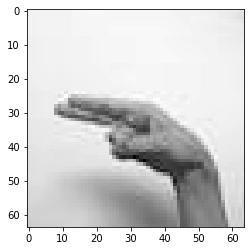

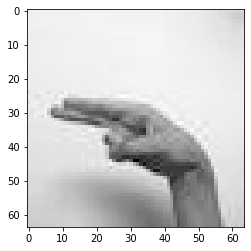

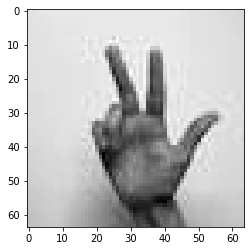

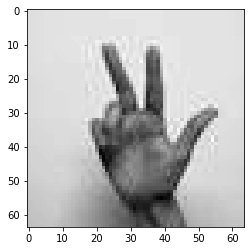

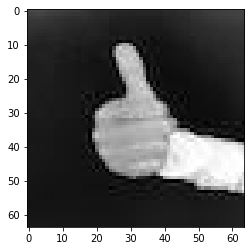

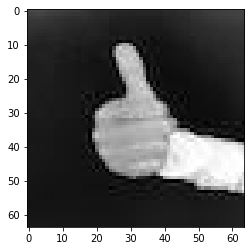

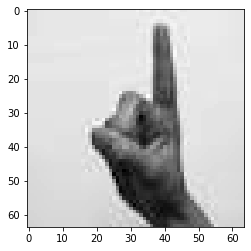

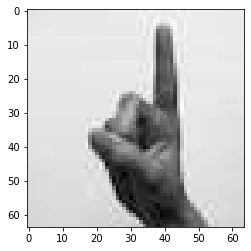

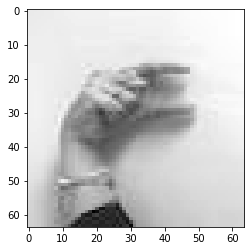

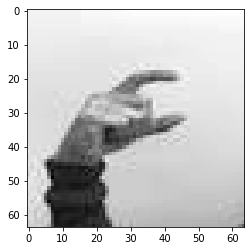

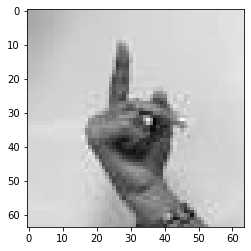

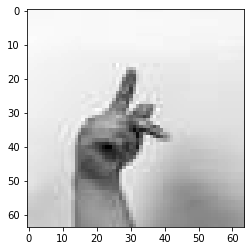

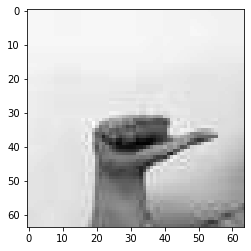

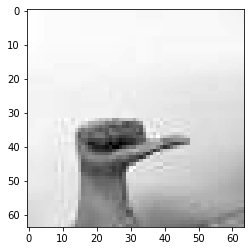

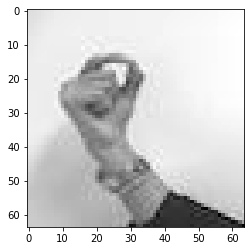

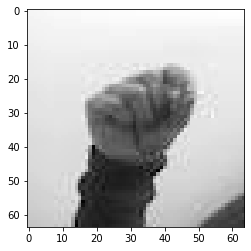

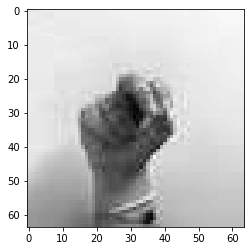

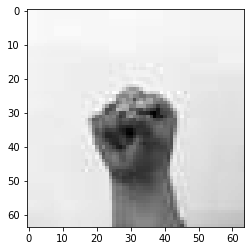

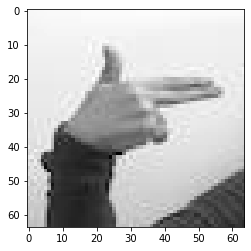

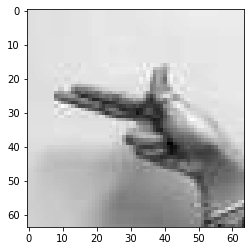

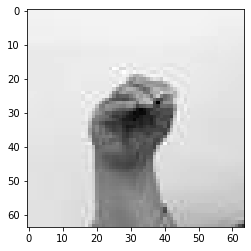

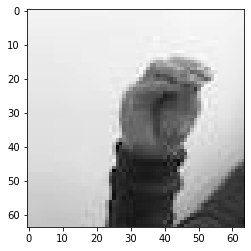

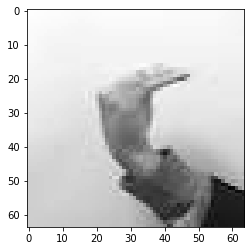

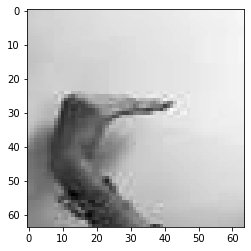

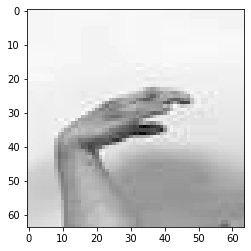

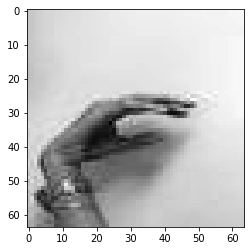

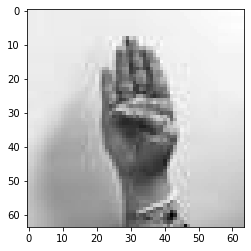

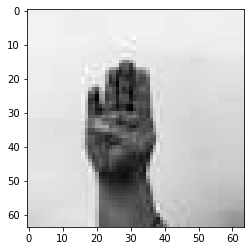

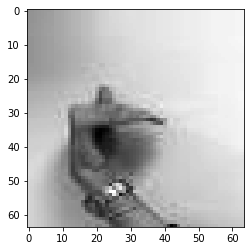

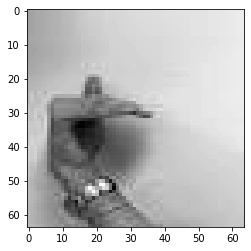

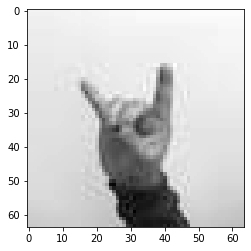

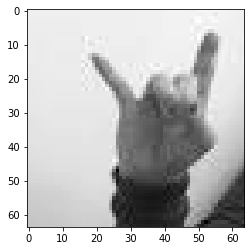

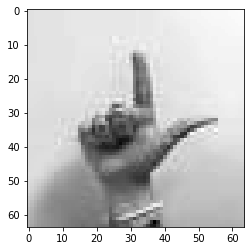

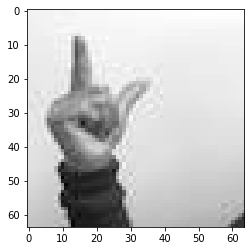

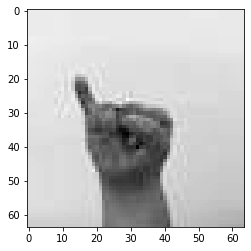

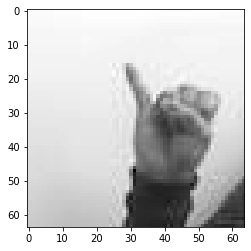

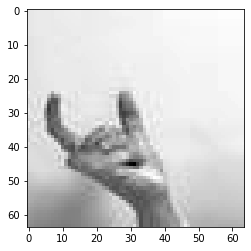

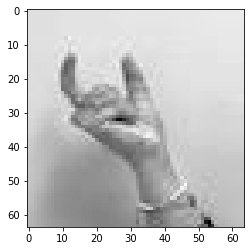

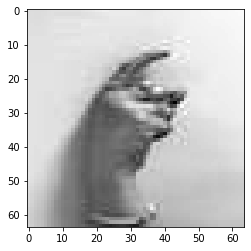

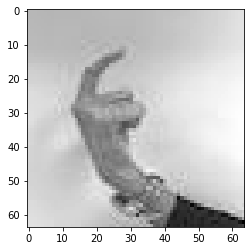

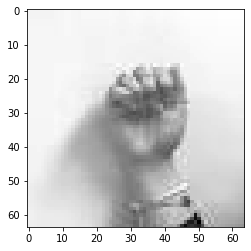

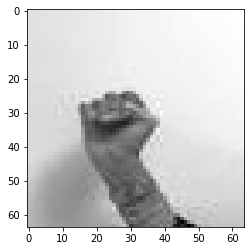

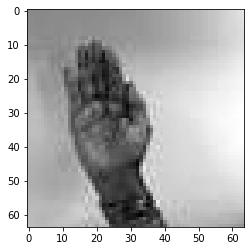

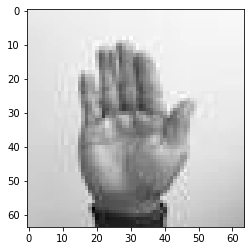

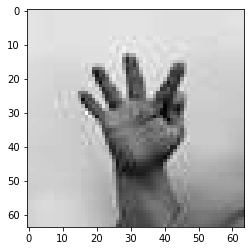

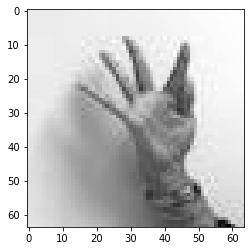

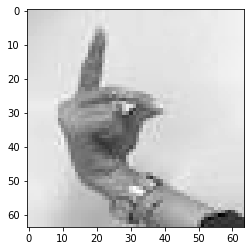

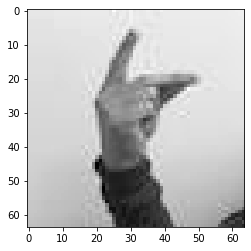

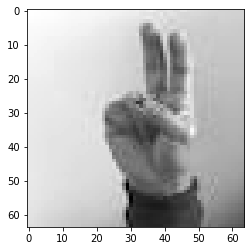

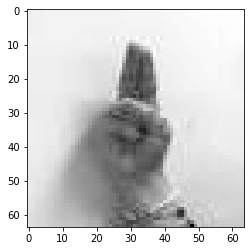

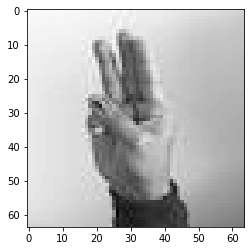

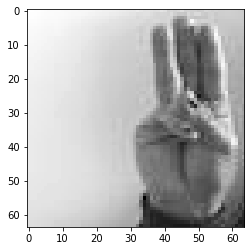

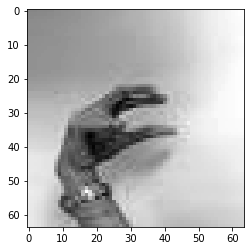

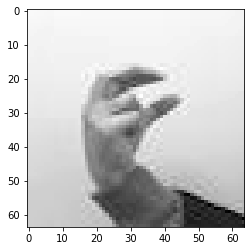

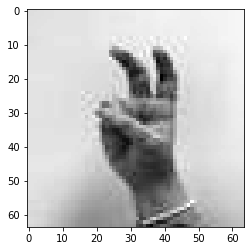

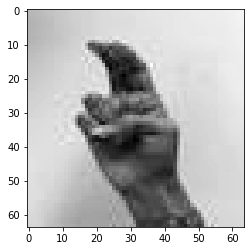

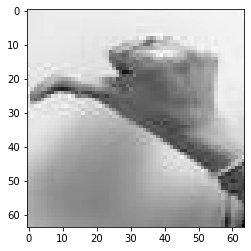

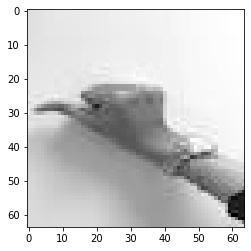

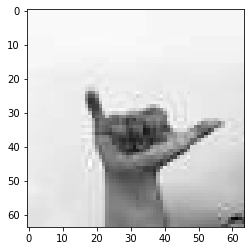

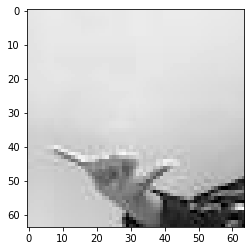

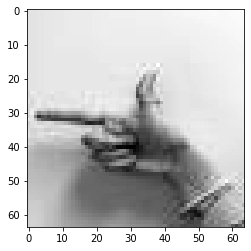

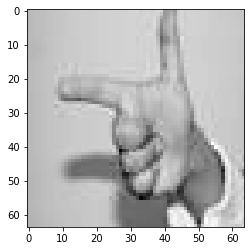

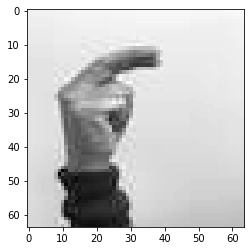

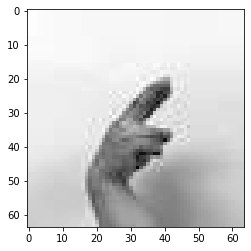

In [ ]:
DATADIR ='D:/Graduation/Datasets/SignLanguage/ArASL_Database_54K_Final'

CATEGORIES = ['ain',
 'al',
 'aleff',
 'bb',
 'dal',
 'dha',
 'dhad',
 'fa',
 'gaaf',
 'ghain',
 'ha',
 'haa',
 'jeem',
 'kaaf',
 'khaa',
 'la',
 'laam',
 'meem',
 'nun',
 'ra',
 'saad',
 'seen',
 'sheen',
 'ta',
 'taa',
 'thaa',
 'thal',
 'toot',
 'waw',
 'ya',
 'yaa',
 'zay']
for category in CATEGORIES:  
    path = os.path.join(DATADIR,category)  # create path 
    x=0
    for img in os.listdir(path):  # iterate over each image 
        x+=1
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display
        if x==2 : 
            break       

Read data details from CSV file

In [ ]:
datacv = pd.read_csv('ImagesClassPath.csv')
print(datacv.shape)
datacv.info()
datacv.isnull().any()
datacv.describe()

(54049, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54049 entries, 0 to 54048
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         54049 non-null  int64 
 1   ClassId    54049 non-null  int64 
 2   ImagePath  54049 non-null  object
dtypes: int64(2), object(1)
memory usage: 1.2+ MB


,id,ClassId
count,54049.000000,54049.000000
mean,27025.000000,15.202686
std,15602.746687,9.108458
min,1.000000,0.000000
25%,13513.000000,7.000000
50%,27025.000000,15.000000
75%,40537.000000,23.000000
max,54049.000000,31.000000


In [ ]:
datacv.head()

,id,ClassId,ImagePath
0,1,0,ArASL_Database_54K/ain/AIN (1).JPG
1,2,0,ArASL_Database_54K/ain/AIN (10).JPG
2,3,0,ArASL_Database_54K/ain/AIN (100).jpg
3,4,0,ArASL_Database_54K/ain/AIN (1000).JPG
4,5,0,ArASL_Database_54K/ain/AIN (1001).JPG


In [ ]:
arabic_letters = ['ع', 'ال', 'ا', 'ب', 'د', 'ظ', 'ض', 'ف', 'ق', 'غ', 'ه', 'ح', 'ج', 'ك', 'خ', 'لا', 'ل', 'م', 'ن', 'ر', 'ص', 'س', 'ش', 'ط', 'ت', 'ث', 'ذ', 'ة', 'و', 'ئ', 'ي', 'ز']

In [ ]:
for i in range(datacv.shape[0]):
    datacv.loc[i, 'ClassId'] = arabic_letters[datacv.loc[i, 'ClassId']]


In [ ]:
datacv.head(-5)

,id,ClassId,ImagePath
0,1,ع,ArASL_Database_54K/ain/AIN (1).JPG
1,2,ع,ArASL_Database_54K/ain/AIN (10).JPG
2,3,ع,ArASL_Database_54K/ain/AIN (100).jpg
3,4,ع,ArASL_Database_54K/ain/AIN (1000).JPG
4,5,ع,ArASL_Database_54K/ain/AIN (1001).JPG
...,...,...,...
54039,54040,ز,ArASL_Database_54K/zay/ZAY (990).jpg
54040,54041,ز,ArASL_Database_54K/zay/ZAY (991).jpg
54041,54042,ز,ArASL_Database_54K/zay/ZAY (992).jpg
54042,54043,ز,ArASL_Database_54K/zay/ZAY (993).jpg


In [ ]:
import warnings
import seaborn as sns

In [ ]:
sns.set()
warnings.filterwarnings("ignore")

Text(0.5, 1.0, 'Frequency of each letters')

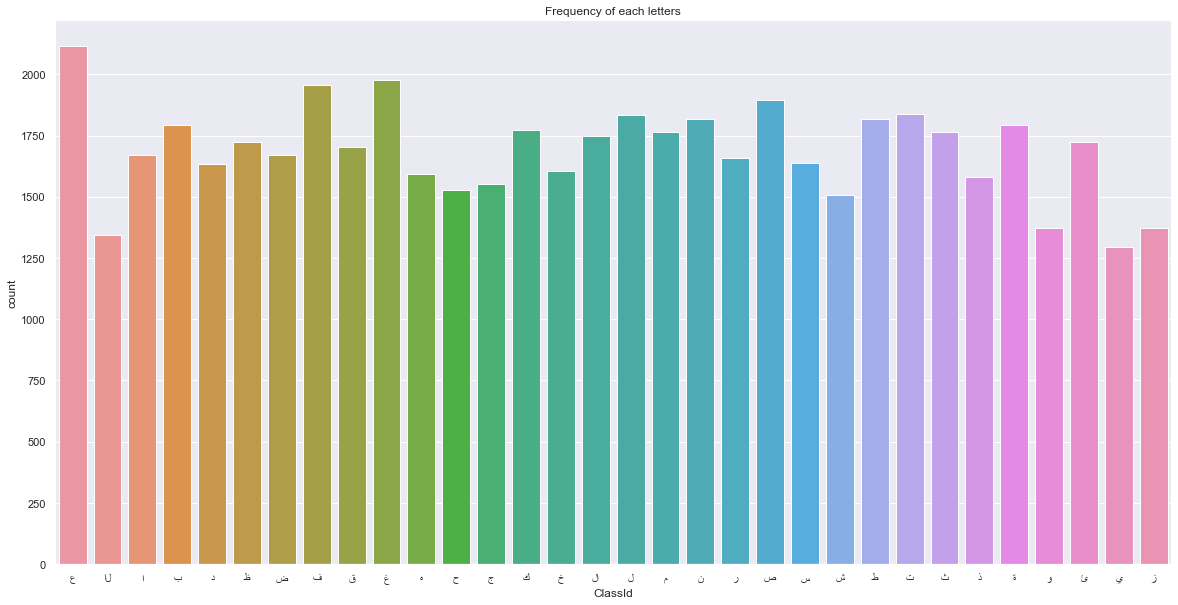

In [ ]:
data_label=datacv['ClassId']

plt.figure(figsize=(20,10))
sns.countplot(data_label)
plt.title("Frequency of each letters")

<AxesSubplot:>

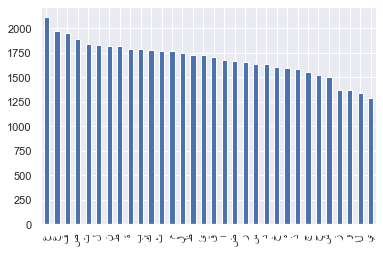

In [ ]:
datacv['ClassId'].value_counts().plot.bar()

count image in each folder

In [ ]:
for folder in  os.listdir(DATADIR) : 
    files = gb.glob(pathname= str( 'ArASL_Database_54K_Final//'  + folder + '/*.jpg'))
    print(f'found {len(files)} in folder {folder}')

found 0 in folder ain
found 0 in folder al
found 0 in folder aleff
found 0 in folder bb
found 0 in folder dal
found 0 in folder dha
found 0 in folder dhad
found 0 in folder fa
found 0 in folder gaaf
found 0 in folder ghain
found 0 in folder ha
found 0 in folder haa
found 0 in folder jeem
found 0 in folder kaaf
found 0 in folder khaa
found 0 in folder la
found 0 in folder laam
found 0 in folder meem
found 0 in folder nun
found 0 in folder ra
found 0 in folder saad
found 0 in folder seen
found 0 in folder sheen
found 0 in folder ta
found 0 in folder taa
found 0 in folder thaa
found 0 in folder thal
found 0 in folder toot
found 0 in folder waw
found 0 in folder ya
found 0 in folder yaa
found 0 in folder zay


In [ ]:
print(img_array)
print(img_array.shape)


[[224 224 224 ... 220 220 220]
 [224 224 224 ... 220 220 220]
 [224 224 224 ... 220 220 220]
 ...
 [188 188 189 ... 178 179 179]
 [188 188 188 ... 176 177 178]
 [188 188 188 ... 176 177 177]]
(64, 64)


images sizes

In [ ]:
size = []
l = os.listdir(DATADIR)
print(l)
for folder in  os.listdir(DATADIR) : 
    files = gb.glob(pathname= str( DATADIR +"/" +folder + '/*.jpg'))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

['ain', 'al', 'aleff', 'bb', 'dal', 'dha', 'dhad', 'fa', 'gaaf', 'ghain', 'ha', 'haa', 'jeem', 'kaaf', 'khaa', 'la', 'laam', 'meem', 'nun', 'ra', 'saad', 'seen', 'sheen', 'ta', 'taa', 'thaa', 'thal', 'toot', 'waw', 'ya', 'yaa', 'zay']


(64, 64)       53391
(256, 256)       638
(64, 64, 3)       10
(1024, 768)       10
dtype: int64

#resize to normalize data size

In [ ]:
training_data = []
IMG_SIZE=64
def create_training_data():
    for category in CATEGORIES:  # do 

        path = os.path.join(DATADIR,category)  # create path to 
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1).

        for img in tqdm(os.listdir(path)):  # iterate over each image 
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
           

create_training_data()

print(len(training_data))

100%|████████████████████████████████████████████████████████████████████████████| 1374/1374 [00:00<00:00, 3996.82it/s]

54049


In [ ]:
import random
random.shuffle(training_data)
for sample in training_data[:10]:
    print(sample[1])

20
2
20
25
30
26
13
27
24
19


In [ ]:
training_data[:10]


[[array([[232, 232, 232, ..., 217, 216, 216],
         [232, 232, 232, ..., 217, 216, 216],
         [232, 232, 232, ..., 216, 215, 215],
         ...,
         [205, 205, 205, ..., 128, 121, 116],
         [205, 205, 205, ..., 122, 114, 115],
         [205, 205, 205, ..., 118, 110, 114]], dtype=uint8),
  20],
 [array([[42, 41, 39, ..., 28, 28, 28],
         [42, 41, 39, ..., 28, 28, 28],
         [41, 40, 38, ..., 27, 27, 27],
         ...,
         [19, 19, 19, ...,  9, 12, 14],
         [19, 19, 19, ..., 11, 15, 20],
         [19, 19, 19, ..., 13, 19, 24]], dtype=uint8),
  2],
 [array([[ 48,  48,  48, ...,  50,  50,  50],
         [ 48,  47,  47, ...,  48,  48,  48],
         [ 46,  46,  46, ...,  46,  46,  46],
         ...,
         [ 26,  25,  25, ..., 164, 180, 206],
         [ 26,  26,  25, ..., 188, 213, 226],
         [ 26,  26,  25, ..., 174, 208, 225]], dtype=uint8),
  20],
 [array([[210, 210, 210, ..., 212, 212, 211],
         [210, 210, 210, ..., 212, 212, 211],
         

#split data to x and y

In [ ]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE)
y = np.array(y)

[[[[232]
   [232]
   [232]
   ...
   [217]
   [216]
   [216]]

  [[232]
   [232]
   [232]
   ...
   [217]
   [216]
   [216]]

  [[232]
   [232]
   [232]
   ...
   [216]
   [215]
   [215]]

  ...

  [[205]
   [205]
   [205]
   ...
   [128]
   [121]
   [116]]

  [[205]
   [205]
   [205]
   ...
   [122]
   [114]
   [115]]

  [[205]
   [205]
   [205]
   ...
   [118]
   [110]
   [114]]]]


In [ ]:
print(len(X))
print(len(y))
print(f'X shape  is {X.shape}')
print(f'Y shape  is {y.shape}')

54049
54049
X shape  is (54049, 64, 64)
Y shape  is (54049,)


In [ ]:
symbol = {'ع':0 ,
        'ال':1,
        'ا':2,
        'ب':3,
        'د':4,
        'ظ':5,
        'ض':6,
        'ف':7,
        'ق':8,
        'غ':9,
        'ه':10,
        'ح':11,
        'ج':12,
        'ك':13,
        'خ':14,
        'لا':15,
        'ل':16,
        'م':17,
        'ن':18,
        'ر':19,
        'ص':20,
        'س':21,
        'ش':22,
        'ط':23,
        'ت':24,
        'ث':25,
        'ذ':26,
        'ة':27,
        'و':28,
        'ئ':29,
        'ي':30,
        'ز':31,}
print(symbol)
def getsymbol(s) : 
    for i , j in symbol.items() : 
        if s == j : 
            return i    

{'ع': 0, 'ال': 1, 'ا': 2, 'ب': 3, 'د': 4, 'ظ': 5, 'ض': 6, 'ف': 7, 'ق': 8, 'غ': 9, 'ه': 10, 'ح': 11, 'ج': 12, 'ك': 13, 'خ': 14, 'لا': 15, 'ل': 16, 'م': 17, 'ن': 18, 'ر': 19, 'ص': 20, 'س': 21, 'ش': 22, 'ط': 23, 'ت': 24, 'ث': 25, 'ذ': 26, 'ة': 27, 'و': 28, 'ئ': 29, 'ي': 30, 'ز': 31}


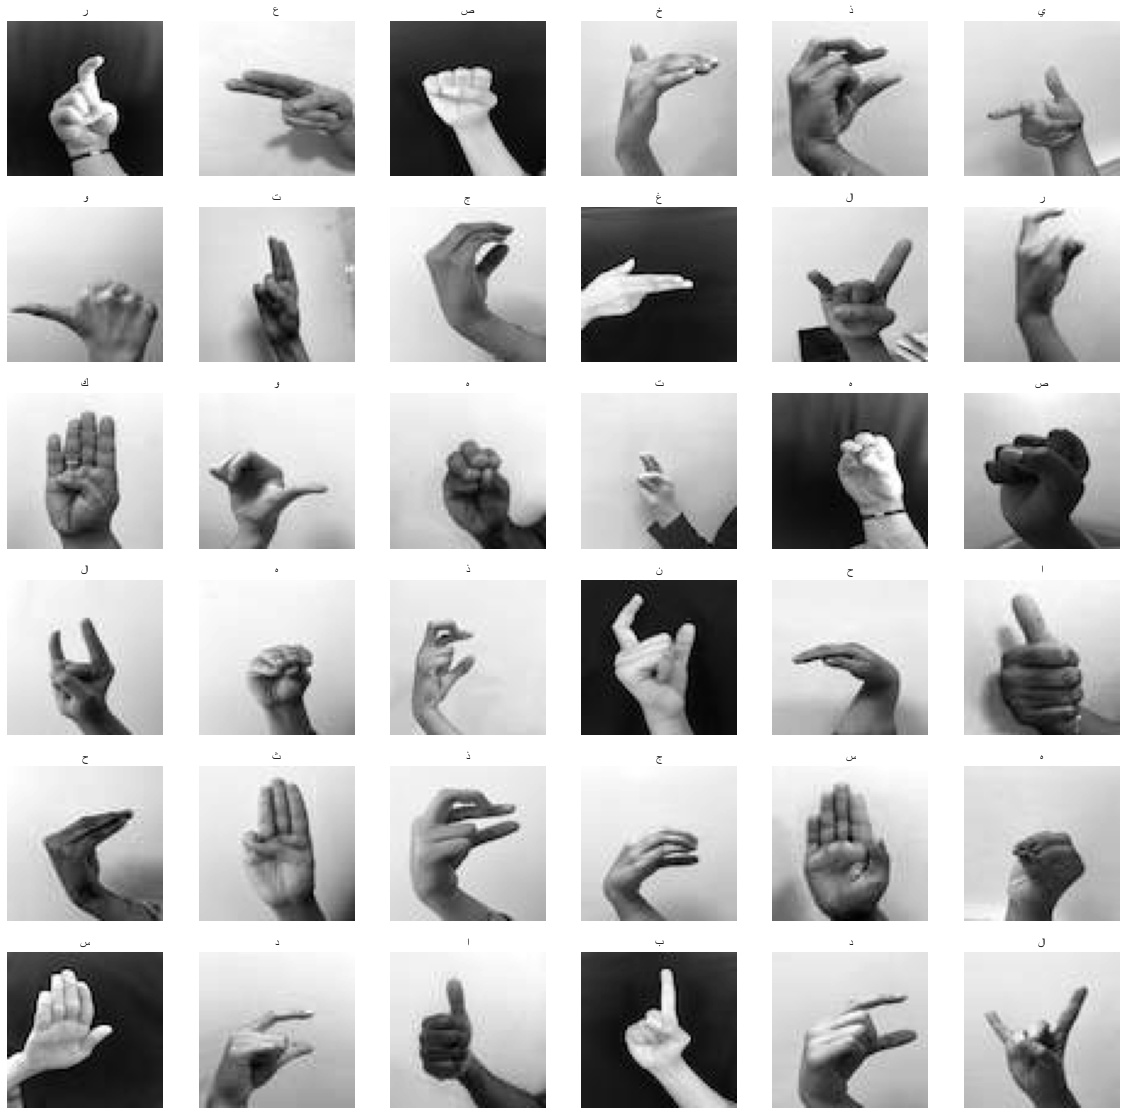

In [ ]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X[i],cmap='gray')   
    plt.axis('off')
    plt.title(getsymbol(y[i]))

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=44, shuffle =True)

#Splitted Data
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (40536, 64, 64)
X_test shape is  (13513, 64, 64)
y_train shape is  (40536,)
y_test shape is  (13513,)


In [ ]:
########################################################################################################################

#  Classification using SVM



In [ ]:
from sklearn.svm import SVC

In [ ]:
print(len(training_data))

54049


In [ ]:
lenofimage = len(training_data)

In [ ]:
X[1]

array([[42, 41, 39, ..., 28, 28, 28],
       [42, 41, 39, ..., 28, 28, 28],
       [41, 40, 38, ..., 27, 27, 27],
       ...,
       [19, 19, 19, ...,  9, 12, 14],
       [19, 19, 19, ..., 11, 15, 20],
       [19, 19, 19, ..., 13, 19, 24]], dtype=uint8)

In [ ]:
X = X/255.0

In [ ]:
X[1]

array([[0.16470588, 0.16078431, 0.15294118, ..., 0.10980392, 0.10980392,
        0.10980392],
       [0.16470588, 0.16078431, 0.15294118, ..., 0.10980392, 0.10980392,
        0.10980392],
       [0.16078431, 0.15686275, 0.14901961, ..., 0.10588235, 0.10588235,
        0.10588235],
       ...,
       [0.0745098 , 0.0745098 , 0.0745098 , ..., 0.03529412, 0.04705882,
        0.05490196],
       [0.0745098 , 0.0745098 , 0.0745098 , ..., 0.04313725, 0.05882353,
        0.07843137],
       [0.0745098 , 0.0745098 , 0.0745098 , ..., 0.05098039, 0.0745098 ,
        0.09411765]])

In [ ]:
print(len(training_data))

54049


In [ ]:
y=np.array(y)
y.shape

(54049,)

In [ ]:
X_train.shape

(40536, 64, 64)

In [ ]:
X_test.shape

(13513, 64, 64)

In [ ]:
nsamples, nx, ny = X_train.shape
d2_X_train = X_train.reshape((nsamples,nx*ny))

In [ ]:
nsamples, nx, ny = X_test.shape
d2_X_test = X_test.reshape((nsamples,nx*ny))

In [ ]:
d2_X_train.shape

(40536, 4096)

In [ ]:
d2_X_test.shape

(13513, 4096)

# Designing Model Architecture



In [ ]:
svc = SVC(kernel='linear',gamma='auto')
svc.fit(d2_X_train, y_train)

SVC(gamma='auto', kernel='linear')

In [ ]:
y2 = svc.predict(d2_X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy: ",accuracy_score(y_test,y2)*100,"%")

Accuracy:  89.30659365055872 %


In [ ]:
#Check for overfitting and underfitting
print("Training Accuracy:",svc.score(d2_X_train, y_train)*100,"%","\n")
print("Testing Accuracy:",svc.score(d2_X_test, y_test)*100,"%")

Training Accuracy: 99.94572725478587 % 

Testing Accuracy: 89.30659365055872 %


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# View confusion matrix for test data and predictions

cm=confusion_matrix(y_test, y2)
print(cm)

[[497   0   3 ...   0   2   1]
 [  0 300   2 ...   1   0   1]
 [  3   3 374 ...   1   0   0]
 ...
 [  0   1   0 ... 390   0   1]
 [  4   0   0 ...   0 307   0]
 [  0   5   0 ...   0   0 279]]


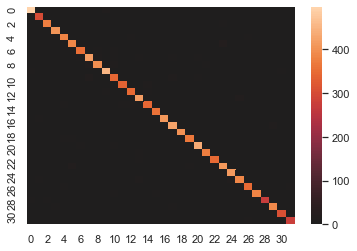

In [ ]:
sns.heatmap(cm, center = True)
plt.show()

In [ ]:
Precision	Precision is defined as the ratio of true positives to the sum of true and false positives.

In [ ]:
Recall	Recall is defined as the ratio of true positives to the sum of true positives and false negatives.

In [ ]:
F1 Score	The F1 is the weighted harmonic mean of precision and recall. The closer the value of the F1 score is to 1.0, the better the expected performance of the model is.

In [ ]:
Support	Support is the number of actual occurrences of the class in the dataset. It doesn’t vary between models, it just diagnoses the performance evaluation process.

In [ ]:
from sklearn.metrics import classification_report
print("Accuracy on unknown data is",classification_report(y_test,y2))

Accuracy on unknown data is               precision    recall  f1-score   support

           0       0.91      0.93      0.92       535
           1       0.87      0.93      0.90       321
           2       0.85      0.88      0.86       427
           3       0.87      0.92      0.90       439
           4       0.86      0.90      0.88       425
           5       0.91      0.86      0.88       450
           6       0.87      0.89      0.88       399
           7       0.88      0.85      0.86       489
           8       0.87      0.85      0.86       467
           9       0.90      0.93      0.92       488
          10       0.84      0.84      0.84       411
          11       0.88      0.87      0.88       383
          12       0.88      0.89      0.88       388
          13       0.86      0.92      0.89       454
          14       0.86      0.86      0.86       402
          15       0.92      0.94      0.93       386
          16       0.92      0.90      0.91       451

In [ ]:
result = pd.DataFrame({'original' : y_test,'predicted' : y2})

In [ ]:
for i in range(result.shape[0]):
    result.loc[i, 'original'] = arabic_letters[result.loc[i, 'original']]
    result.loc[i, 'predicted'] = arabic_letters[result.loc[i, 'predicted']]

In [ ]:
result

,original,predicted
0,ر,ر
1,ل,ل
2,ل,ل
3,ج,ذ
4,ح,ح
...,...,...
13508,ب,ب
13509,ض,ق
13510,ق,ق
13511,غ,غ


# Test Data Pipline



In [ ]:
def resizeImage(imagePath):
    try:
        img_array = cv2.imread(imagePath, cv2.IMREAD_GRAYSCALE)
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    except Exception as e:
        print(e.message())
    new_array=new_array.reshape(-1, IMG_SIZE, IMG_SIZE)
    nsamples, nx, ny = new_array.shape
    new_array=new_array.reshape((nsamples,nx*ny))
    return new_array

In [ ]:
dataPredict = []
for imgPath in os.listdir("D:\Graduation\ML&NN\co_sign lang\predict_Data"):
    img = resizeImage("D:\Graduation\ML&NN\co_sign lang\predict_Data\\" + imgPath)
    print(imgPath)
    dataPredict.append(svc.predict(img))

AIN (2114).jpg
AL (1343).jpg
Aleff (1672).JPG
BB (1791).jpg
DAL (1634).jpg
DHA (1723).jpg
DHAD (1670).jpg
FA (1955).jpg
GAAF (1705).jpg
GHAIN (1977).jpg
HA (1592).jpg
HAA (1).JPG
JEEM (1552).jpg
KAAF (1774).jpg
KHAA (1607).jpg
LA (1746).jpg
LAAM (1832).jpg
MEEM (1765).jpg
Nun (1819).jpg
RA (1659).jpg
SAAD (1895).jpg
SEEN (1638).jpg
SHEEN (1507).jpg
TA (1816).jpg
TAA (1838).jpg
THAA (1766).jpg
THAL (1582).jpg
TOOT (1791).jpg
WAW (1371).jpg
YA (1722).jpg
YAA (1293).jpg
ZAY (1374).jpg


In [ ]:
dataPredict

[array([0]),
 array([1]),
 array([2]),
 array([3]),
 array([4]),
 array([5]),
 array([6]),
 array([7]),
 array([8]),
 array([9]),
 array([10]),
 array([2]),
 array([12]),
 array([13]),
 array([14]),
 array([15]),
 array([16]),
 array([17]),
 array([18]),
 array([19]),
 array([20]),
 array([21]),
 array([3]),
 array([23]),
 array([24]),
 array([25]),
 array([26]),
 array([27]),
 array([28]),
 array([29]),
 array([30]),
 array([31])]

# شمس



In [ ]:
PredictSH = []
for imgPath in os.listdir("D:\Graduation\ML&NN\co_sign lang\SHAMS"):
    img = resizeImage(r"D:\Graduation\ML&NN\co_sign lang\SHAMS\\" + imgPath)
    print(imgPath)
    Array=svc.predict(img)               
    PredictSH.append(getsymbol(Array))

1.jpg
MEEM (1765).jpg
SEEN (1638).jpg


In [ ]:
PredictSH

['ب', 'م', 'س']

In [ ]:
str1 = "".join(str(e) for e in PredictSH )
str1

'بمس'

# قمر



In [ ]:
PredictMoon = []
for imgPath in os.listdir("D:\Graduation\ML&NN\co_sign lang\MOON"):
    img = resizeImage(r"D:\Graduation\ML&NN\co_sign lang\MOON\\" + imgPath)
    print(imgPath)
    Array=svc.predict(img)           
    PredictMoon.append(getsymbol(Array))

GAAF (1705).jpg
MEEM (1765).jpg
RA (1659).jpg


In [ ]:
PredictMoon

['ق', 'م', 'ر']

In [ ]:
str2 = "".join(str(e) for e in PredictMoon )
str2

'قمر'

# يلعب



In [ ]:
PredictP = []
for imgPath in os.listdir("D:\Graduation\ML&NN\co_sign lang\play"):
    img = resizeImage(r"D:\Graduation\ML&NN\co_sign lang\play\\" + imgPath)
    print(imgPath)
    Array=svc.predict(img)             
    PredictP.append(getsymbol(Array))

1Yaa.JPG
2.jpg
AIN (2114).jpg
BB (1791).jpg


In [ ]:
PredictP

['ي', 'ل', 'ع', 'ب']

In [ ]:
str3 = "".join(str(e) for e in PredictP )
str3

'يلعب'

# محمود



In [ ]:
PredictMD = []
for imgPath in os.listdir("D:\Graduation\ML&NN\MAHMOUD"):
    img = resizeImage(r"D:\Graduation\ML&NN\MAHMOUD\\" + imgPath)
    print(imgPath)
    Array=svc.predict(img)             
    PredictMD.append(getsymbol(Array))

1Meem.JPG
2HAA.JPG
3Meem.JPG
4waw.JPG
5DAL.JPG


In [ ]:
PredictMD

['م', 'ح', 'م', 'ش', 'د']

In [ ]:
str4 = "".join(str(e) for e in PredictMD )
str4

'محمشد'

# بسم الله الرحمن الرحيم



In [ ]:
GOD = []

PredictB = []
for imgPath in os.listdir("D:\Graduation\ML&NN\In the name of GOD\Besm"):
    img = resizeImage(r"D:\Graduation\ML&NN\In the name of GOD\Besm\\" + imgPath)
    print(imgPath)
    Array=svc.predict(img)
    PredictB.append(getsymbol(Array))
    Array


strB = "".join(str(e) for e in PredictB )
strB
GOD.append(strB)
PredictAH = []
for imgPath in os.listdir("D:\Graduation\ML&NN\In the name of GOD\Allah"):
    img = resizeImage(r"D:\Graduation\ML&NN\In the name of GOD\Allah\\" + imgPath)
    print(imgPath)
    Array=svc.predict(img)
    PredictAH.append(getsymbol(Array))
    Array

strAH = "".join(str(e) for e in PredictAH )
strAH
GOD.append(strAH)   

PredictAR = []
for imgPath in os.listdir("D:\Graduation\ML&NN\In the name of GOD\Alrahman"):
    img = resizeImage(r"D:\Graduation\ML&NN\In the name of GOD\Alrahman\\" + imgPath)
    print(imgPath)
    Array=svc.predict(img)
    PredictAR.append(getsymbol(Array))
    Array

strAR = "".join(str(e) for e in PredictAR )
strAR
GOD.append(strAR)  

PredictARH = []
for imgPath in os.listdir("D:\Graduation\ML&NN\In the name of GOD\Alraheim"):
    img = resizeImage(r"D:\Graduation\ML&NN\In the name of GOD\Alraheim\\" + imgPath)
    print(imgPath)
    Array=svc.predict(img)
    PredictARH.append(getsymbol(Array))
    Array

strARH = "".join(str(e) for e in PredictARH )
strARH
GOD.append(strARH)

strGOD = " ".join(str(e) for e in GOD)
strGOD

1Bb.JPG
2Seen.JPG
3Meem.JPG
1Alef.JPG
2Lam.JPG
3Lam.JPG
4Haa.JPG
1Alef.JPG
2Lam.JPG
3Raa.JPG
4Haa.JPG
5Meem.JPG
6Nun.JPG
1Alef.JPG
2Lam.JPG
3Raa.JPG
4Haa.JPG
5Yaa.JPG
6Meem.JPG


'بسم اذله اذرامن اذرايم'

# اين يقع شارع الهرم



In [ ]:
HARAM = []

PredictH = []
for imgPath in os.listdir("D:\Graduation\ML&NN\Haram\Ain"):
    img = resizeImage(r"D:\Graduation\ML&NN\Haram\Ain\\" + imgPath)
    print(imgPath)
    Array=svc.predict(img)
    PredictH.append(getsymbol(Array))
strH = "".join(str(e) for e in PredictH )
strH
HARAM.append(strH)

PredictL = []
for imgPath in os.listdir("D:\Graduation\ML&NN\Haram\Locate"):
    img = resizeImage(r"D:\Graduation\ML&NN\Haram\Locate\\" + imgPath)
    print(imgPath)
    Array=svc.predict(img)
    PredictL.append(getsymbol(Array))
strL = "".join(str(e) for e in PredictL)
strL
HARAM.append(strL)

PredictST = []
for imgPath in os.listdir("D:\Graduation\ML&NN\Haram\Street"):
    img = resizeImage(r"D:\Graduation\ML&NN\Haram\Street\\" + imgPath)
    print(imgPath)
    Array=svc.predict(img)
    PredictST.append(getsymbol(Array))
strST = "".join(str(e) for e in PredictST)
strST
HARAM.append(strST)    
    
PredictHA = []
for imgPath in os.listdir("D:\Graduation\ML&NN\Haram\Haram"):
    img = resizeImage(r"D:\Graduation\ML&NN\Haram\Haram\\" + imgPath)
    print(imgPath)
    Array=svc.predict(img)
    PredictHA.append(getsymbol(Array))  
strHA = "".join(str(e) for e in PredictHA)
strHA
HARAM.append(strHA)   

strHARAM = " ".join(str(e) for e in HARAM)
strHARAM

1A.JPG
2Ya.JPG
3Non.JPG
1Yaa.JPG
2Gaf.JPG
3Ain.JPG
1Sheen.JPG
2A.JPG
3Ra.JPG
4Ain.jpg
1A.JPG
2Lam.JPG
3Ha.JPG
4Ra.JPG
5Meem.JPG


'اعئ يخع شارع اذهبم'

# انا اريد عصير



In [ ]:
Juice = []

PredictI = []
for imgPath in os.listdir("D:\Graduation\ML&NN\Juice\I"):
    img = resizeImage(r"D:\Graduation\ML&NN\Juice\I\\" + imgPath)
    print(imgPath)
    Array=svc.predict(img)
    PredictI.append(getsymbol(Array))
strI = "".join(str(e) for e in PredictI )
strI
Juice.append(strI)

PredictW = []
for imgPath in os.listdir("D:\Graduation\ML&NN\Juice\Want"):
    img = resizeImage(r"D:\Graduation\ML&NN\Juice\Want\\" + imgPath)
    print(imgPath)
    Array=svc.predict(img)
    PredictW.append(getsymbol(Array))
strL = "".join(str(e) for e in PredictW)
strL
Juice.append(strL)

PredictJ = []
for imgPath in os.listdir("D:\Graduation\ML&NN\Juice\Juice"):
    img = resizeImage(r"D:\Graduation\ML&NN\Juice\Juice\\" + imgPath)
    print(imgPath)
    Array=svc.predict(img)
    PredictJ.append(getsymbol(Array))
strJ = "".join(str(e) for e in PredictJ)
strJ
Juice.append(strJ)    
     

strJuice = " ".join(str(e) for e in Juice)
strJuice

1A.JPG
2N.JPG
3A.JPG
1A.JPG
2Ra.JPG
3Yaa.JPG
4Dal.JPG
1AIN.JPG
2SADD.JPG
3YAA.JPG
4RA.JPG


'انا اريد عصعر'